# Gemaakt op 24/04/2025 door martijn

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
my_data = pd.read_csv("./games.csv")
my_data

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


# univariate analysis

## categorical

- win
- rating

## numerical

- price_final
- user_reviews

## win

I assume that 90% of games are playable on Windows

Playable on windows: 98.4352885673848%


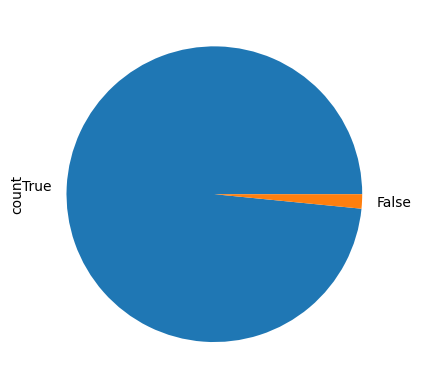

In [18]:
my_data["win"].value_counts(dropna=True).plot(kind="pie")
allItems = my_data["win"].value_counts(dropna=True)[True] + my_data["win"].value_counts(dropna=True)[False]

print(f"Playable on windows: {(my_data["win"].value_counts(dropna=True)[True] / allItems * 100)}%")

### Result1

I assumed it was 90% but it was 98% which is close but not correct.

In [20]:
my_data[my_data["rating"] == "Positive"]


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
30,458790,The House in Fata Morgana Original Soundtrack,2016-05-13,False,False,False,Positive,100,32,11.99,11.99,0.0,True
31,462280,Offworld Trading Company - Soundtrack DLC,2016-04-28,True,True,False,Positive,80,10,9.99,9.99,0.0,True
58,393831,Magicka 2: Three Cardinals Robe Pack,2015-09-15,True,True,True,Positive,90,11,4.99,4.99,0.0,True
61,434041,Mordheim: City of the Damned - The Smuggler,2016-02-04,True,False,False,Positive,96,25,1.99,1.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50805,1588720,Ion Fury: Aftershock,2023-10-02,True,False,True,Positive,97,35,13.00,0.00,0.0,True
50811,1845670,Islands of the Caliph,2023-09-29,True,False,False,Positive,91,48,8.00,0.00,0.0,True
50820,2002870,Rhapsody II: Ballad of the Little Princess,2023-08-29,True,False,False,Positive,87,16,22.00,0.00,0.0,True
50839,2380280,Let's Build a Zoo: Aquarium Odyssey,2023-08-17,True,False,False,Positive,100,16,10.00,0.00,0.0,True
